In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from ggplot import *

In [ ]:
dataset = pd.read_csv('../data/Series3_6.15.17_padel.csv')
dataset.dropna(axis=0, how='any',inplace=True)
dataset.reset_index(drop=True, inplace=True)
target= dataset.IC50
descriptors = dataset.drop('IC50', axis = 1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in descriptors:
    if descriptors[column].dtype == object:
        descriptors[column] = le.fit_transform(descriptors[column])
else:
    pass
x_scalar = StandardScaler()
y_scalar = StandardScaler()

X = x_scalar.fit_transform(descriptors)
y= target.values.reshape(-1,1)
dataset['label'] = target

###### PCA for dimensionality reduction

In [39]:
pca = PCA(n_components=6)
pca_result = pca.fit_transform(X)

dataset['pca-one'] = pca_result[:,0]
dataset['pca-two'] = pca_result[:,1] 

print(pca.explained_variance_ratio_)

[0.39346879 0.10866365 0.06581709 0.06054047 0.04598867 0.03853526]


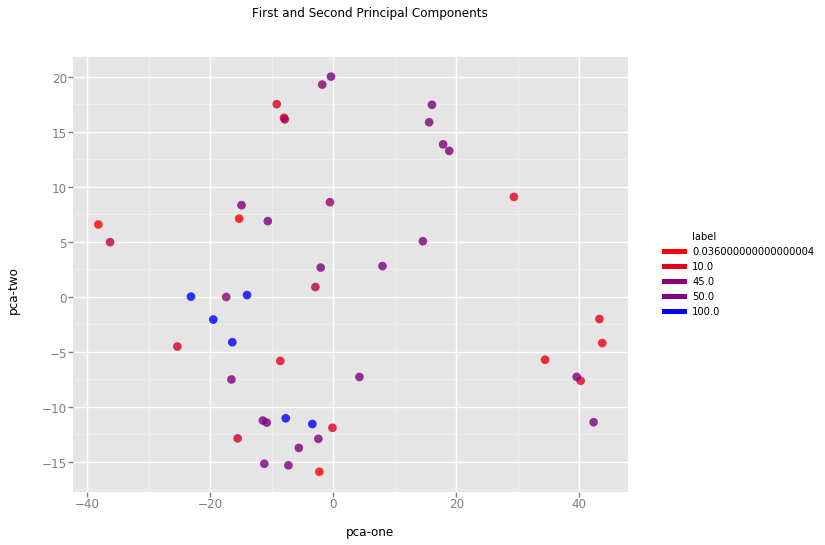

<ggplot: (-9223363246991852344)>

In [45]:
chart = ggplot( dataset, aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("First and Second Principal Components")
chart

###### Skree plot

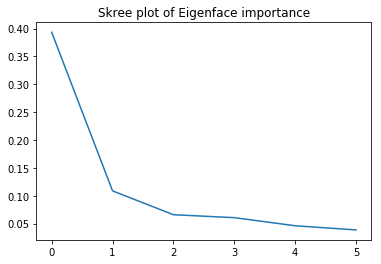

In [41]:
pd.Series(pca.explained_variance_ratio_).plot()
plt.title("Skree plot of Eigenface importance")
plt.show()

###### T-SNE implementation for dimensionality reduction

In [42]:
from sklearn.manifold import TSNE

In [76]:
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=1000)
tsne_results = tsne.fit_transform(X)


[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.001s...
[t-SNE] Computed neighbors for 46 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 11.161075
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.447189
[t-SNE] Error after 1000 iterations: 0.401812


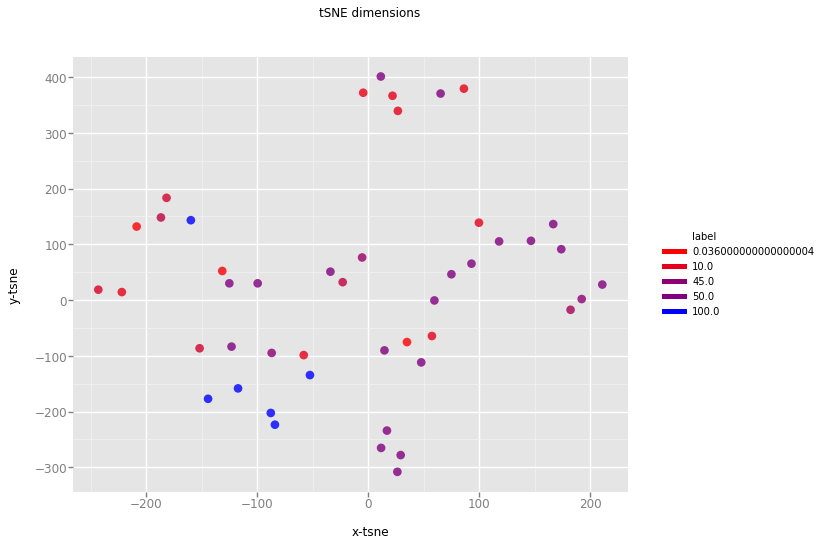

<ggplot: (-9223363246992168409)>

In [77]:
dataset['x-tsne'] = tsne_results[:,0]
dataset['y-tsne'] = tsne_results[:,1]

chart = ggplot( dataset, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'blue') \
        + ggtitle("tSNE dimensions")
chart

###### T-Sne implementation on PCA reduced data

In [53]:
pca_50 = PCA(n_components=40)
pca_result_50 = pca_50.fit_transform(X)
print(np.sum(pca_50.explained_variance_ratio_))

0.9977996577676258


In [74]:
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=1100)
tsne_pca_results = tsne.fit_transform(pca_result_50)


[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.000s...
[t-SNE] Computed neighbors for 46 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 11.175283
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.195892
[t-SNE] Error after 1100 iterations: 0.420864


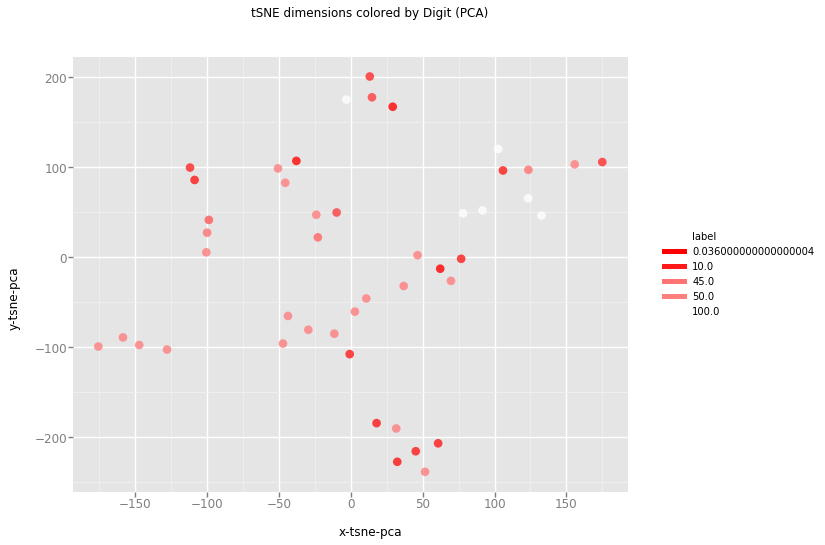

<ggplot: (8789862687117)>

In [75]:
dataset['x-tsne-pca'] = tsne_pca_results[:,0]
dataset['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( dataset, aes(x='x-tsne-pca', y='y-tsne-pca', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'red', high = 'white') \
        + ggtitle("tSNE dimensions colored by Digit (PCA)")
chart